In [1]:
from pathlib import Path

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

Read each CSV into a `DataFrame`.

In [2]:
# hallelujah_path = Path('data', 'good_hallelujah_trials_and_signals_q90_javier_all.csv')
into_dust_path = Path('data', 'good_into_dust_trials_and_signals_q90_javier_all_no_nrs.csv')
# raining_blood_path = Path('data', 'good_raining_blood_trials_and_signals_q90_javier_all.csv')

# hallelujah_df = pd.read_csv(hallelujah_path, index_col='_id')
into_dust_df = pd.read_csv(into_dust_path, index_col='_id')
# raining_blood_df = pd.read_csv(raining_blood_path, index_col='_id')

Concatenate all song `DataFrame`s into a master `DataFrame`.

In [3]:
# all_df = pd.concat([hallelujah_df, into_dust_df, raining_blood_df], axis=0, sort=False)
all_df = into_dust_df

In [4]:
pd.set_option('display.max_columns', None)
all_df.describe()

,answers.age,answers.personality.trusting,answers.personality.artistic,answers.personality.imagination,answers.personality.reserved,answers.personality.outgoing,answers.personality.lazy,answers.personality.stress,answers.personality.nervous,answers.personality.fault,answers.personality.thorough,answers.musical_expertise,answers.concentration,control_power,control_like_dislike,control_tension,control_engagement,control_activity,control_positivity,control_familiarity,song_power,song_like_dislike,song_tension,song_engagement,song_activity,song_positivity,song_familiarity,answers.visual_impairments,control_chillsshiversthrills,song_chillsshiversthrills,control_transcendence,control_sadness,control_wonder,control_joyfulactivation,control_tenderness,control_peacefulness,control_nostalgia,song_transcendence,song_sadness,song_wonder,song_joyfulactivation,song_tenderness,song_peacefulness,song_nostalgia,answers.musicpref.dance,answers.musicpref.rock,answers.musicpref.jazz,answers.musicpref.pop,answers.musicpref.classical,answers.musicpref.hiphop,answers.musicpref.folk,answers.musicpref.traditional_irish,answers.musicpref.hip_hop,answers.musicpref.world
count,165.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,111.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.0,72.000000,144.000000,156.000000,144.000000,144.000000,144.000000,144.000000,0.0,0.0,84.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000
mean,26.963636,3.783333,2.416667,3.866667,3.066667,3.233333,3.533333,3.250000,3.650000,3.116667,3.150000,2.594595,3.866667,3.050000,2.916667,3.333333,3.016667,2.883333,3.083333,-1.0,3.277778,3.277778,3.942308,3.222222,3.465278,3.222222,1.916667,NaN,NaN,1.750000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.916667,3.083333,3.416667,1.750000,3.500000,3.750000,2.916667,0.224242,0.551515,0.169697,0.660606,0.327273,0.036364,0.018182,0.109091,0.151515,0.230303
std,14.383210,1.026623,1.331390,1.016252,1.219428,1.184171,1.241468,1.283863,1.132344,1.222552,1.190713,1.047754,1.111827,1.156045,1.356612,1.188457,1.185958,1.075011,1.154089,0.0,1.345019,1.371256,1.159757,1.401520,1.070345,1.173391,1.214712,NaN,NaN,1.062788,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.164500,1.240112,0.792961,0.753778,0.797724,0.965307,0.996205,0.418352,0.498853,0.376509,0.474945,0.470646,0.187763,0.134015,0.312702,0.359642,0.422308
min,9.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,-1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000,2.000000,1.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,16.000000,3.000000,1.000000,3.000000,2.000000,2.000000,3.000000,2.000000,3.000000,2.000000,2.000000,2.000000,3.000000,2.000000,2.000000,3.000000,2.000000,2.000000,2.000000,-1.0,2.000000,2.000000,4.000000,2.000000,3.000000,2.000000,1.000000,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,2.000000,3.000000,1.000000,3.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,23.000000,4.000000,2.000000,4.000000,3.000000,3.000000,4.000000,3.000000,4.000000,3.000000,3.000000,3.000000,4.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,-1.0,3.000000,3.000000,4.000000,3.000000,4.000000,3.000000,1.000000,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.000000,3.000000,3.000000,2.000000,4.000000,4.000000,3.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,32.000000,4.000000,3.250000,5.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,3.000000,5.000000,4.

# Data Cleanup

Drop `answers.` and `metadata.` from column names.

In [5]:
def strip_prefix(prefix=''):
    def strip_fn(s):
        if s.startswith(prefix):
            return s[len(prefix):]
        return s
    return strip_fn

In [6]:
strip_answers = strip_prefix('answers.')
all_df = all_df.rename(strip_answers, axis='columns')

strip_metadata = strip_prefix('metadata.')
all_df = all_df.rename(strip_metadata, axis='columns')

In [7]:
for c in all_df.columns:
    new_c = c.replace('.', '_')
    mapper_dict = {}
    mapper_dict[c] = new_c
    all_df = all_df.rename(mapper=mapper_dict, axis='columns')

In [8]:
all_df.describe()

,age,personality_trusting,personality_artistic,personality_imagination,personality_reserved,personality_outgoing,personality_lazy,personality_stress,personality_nervous,personality_fault,personality_thorough,musical_expertise,concentration,control_power,control_like_dislike,control_tension,control_engagement,control_activity,control_positivity,control_familiarity,song_power,song_like_dislike,song_tension,song_engagement,song_activity,song_positivity,song_familiarity,visual_impairments,control_chillsshiversthrills,song_chillsshiversthrills,control_transcendence,control_sadness,control_wonder,control_joyfulactivation,control_tenderness,control_peacefulness,control_nostalgia,song_transcendence,song_sadness,song_wonder,song_joyfulactivation,song_tenderness,song_peacefulness,song_nostalgia,musicpref_dance,musicpref_rock,musicpref_jazz,musicpref_pop,musicpref_classical,musicpref_hiphop,musicpref_folk,musicpref_traditional_irish,musicpref_hip_hop,musicpref_world
count,165.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,111.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.0,72.000000,144.000000,156.000000,144.000000,144.000000,144.000000,144.000000,0.0,0.0,84.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000
mean,26.963636,3.783333,2.416667,3.866667,3.066667,3.233333,3.533333,3.250000,3.650000,3.116667,3.150000,2.594595,3.866667,3.050000,2.916667,3.333333,3.016667,2.883333,3.083333,-1.0,3.277778,3.277778,3.942308,3.222222,3.465278,3.222222,1.916667,NaN,NaN,1.750000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.916667,3.083333,3.416667,1.750000,3.500000,3.750000,2.916667,0.224242,0.551515,0.169697,0.660606,0.327273,0.036364,0.018182,0.109091,0.151515,0.230303
std,14.383210,1.026623,1.331390,1.016252,1.219428,1.184171,1.241468,1.283863,1.132344,1.222552,1.190713,1.047754,1.111827,1.156045,1.356612,1.188457,1.185958,1.075011,1.154089,0.0,1.345019,1.371256,1.159757,1.401520,1.070345,1.173391,1.214712,NaN,NaN,1.062788,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.164500,1.240112,0.792961,0.753778,0.797724,0.965307,0.996205,0.418352,0.498853,0.376509,0.474945,0.470646,0.187763,0.134015,0.312702,0.359642,0.422308
min,9.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,-1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000,2.000000,1.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,16.000000,3.000000,1.000000,3.000000,2.000000,2.000000,3.000000,2.000000,3.000000,2.000000,2.000000,2.000000,3.000000,2.000000,2.000000,3.000000,2.000000,2.000000,2.000000,-1.0,2.000000,2.000000,4.000000,2.000000,3.000000,2.000000,1.000000,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,2.000000,3.000000,1.000000,3.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,23.000000,4.000000,2.000000,4.000000,3.000000,3.000000,4.000000,3.000000,4.000000,3.000000,3.000000,3.000000,4.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,-1.0,3.000000,3.000000,4.000000,3.000000,4.000000,3.000000,1.000000,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.000000,3.000000,3.000000,2.000000,4.000000,4.000000,3.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,32.000000,4.000000,3.250000,5.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,3.000000,5.000000,4.000000,4.000000,4.000000,4.000000,3.250000,4.000000,-1.0,4.000000,4.250000,5.000000,4.000000,4.000000,4.000000,3.000000,NaN,NaN,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.000000,4.000000,4.000000,

## `answers.musical_expertise`

Replace missing values with column median.

In [9]:
np.any(all_df.musical_expertise.isna())

True

In [10]:
all_df.musical_expertise.fillna(0, inplace=True)

In [11]:
def column_hist(col):
    bins = np.arange(col.min() - 0.5, col.max() + 1.5, 1)
    plt.hist(col, bins=bins)
    plt.title('Histogram for ' + col.name);

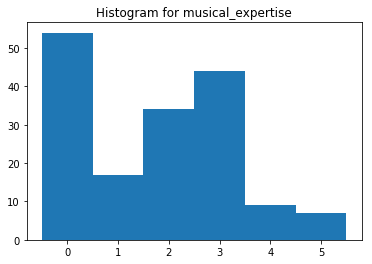

In [12]:
column_hist(all_df.musical_expertise)

In [13]:
all_df.musical_expertise.value_counts()

0.0    54
3.0    44
2.0    34
1.0    17
4.0     9
5.0     7
Name: musical_expertise, dtype: int64

In [14]:
np.any(all_df.musical_expertise.isna())

False

In [15]:
all_df.loc[:, 'musical_expertise'] = all_df.loc[:, 'musical_expertise'].astype('int').astype('category')

## `age`

Check for missing values.

In [16]:
np.any(all_df.age.isna())

False

In [17]:
q25, q75 = all_df.age.quantile(q=.25), all_df.age.quantile(q=.75)
q25, q75

(16.0, 32.0)

In [18]:
iqr = q75 - q25
iqr

16.0

In [19]:
low_cut, high_cut = q25 - (2 * iqr), q75 + (2 * iqr)
low_cut, high_cut

(-16.0, 64.0)

In [20]:
age_outliers = all_df.age[(all_df.age < 6) | (all_df.age > 100)]
age_outliers

Series([], Name: age, dtype: float64)

In [21]:
age_outlier_idx = age_outliers.index
age_outlier_idx

Index([], dtype='object', name='_id')

In [22]:
all_df = all_df.drop(index=age_outlier_idx)
age_outliers = all_df.age[(all_df.age < 6) | (all_df.age > 100)]
age_outliers

Series([], Name: age, dtype: float64)

## `control_chillsshiversthrills`

In [23]:
np.any(all_df.control_chillsshiversthrills.isna())

True

In [24]:
all_df.control_chillsshiversthrills.value_counts()

Series([], Name: control_chillsshiversthrills, dtype: int64)

Drop column, as there are no valid values.

In [25]:
all_df = all_df.drop(columns='control_chillsshiversthrills')

In [26]:
all_df.describe()

,age,personality_trusting,personality_artistic,personality_imagination,personality_reserved,personality_outgoing,personality_lazy,personality_stress,personality_nervous,personality_fault,personality_thorough,concentration,control_power,control_like_dislike,control_tension,control_engagement,control_activity,control_positivity,control_familiarity,song_power,song_like_dislike,song_tension,song_engagement,song_activity,song_positivity,song_familiarity,visual_impairments,song_chillsshiversthrills,control_transcendence,control_sadness,control_wonder,control_joyfulactivation,control_tenderness,control_peacefulness,control_nostalgia,song_transcendence,song_sadness,song_wonder,song_joyfulactivation,song_tenderness,song_peacefulness,song_nostalgia,musicpref_dance,musicpref_rock,musicpref_jazz,musicpref_pop,musicpref_classical,musicpref_hiphop,musicpref_folk,musicpref_traditional_irish,musicpref_hip_hop,musicpref_world
count,165.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.0,72.000000,144.000000,156.000000,144.000000,144.000000,144.000000,144.000000,0.0,84.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000
mean,26.963636,3.783333,2.416667,3.866667,3.066667,3.233333,3.533333,3.250000,3.650000,3.116667,3.150000,3.866667,3.050000,2.916667,3.333333,3.016667,2.883333,3.083333,-1.0,3.277778,3.277778,3.942308,3.222222,3.465278,3.222222,1.916667,NaN,1.750000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.916667,3.083333,3.416667,1.750000,3.500000,3.750000,2.916667,0.224242,0.551515,0.169697,0.660606,0.327273,0.036364,0.018182,0.109091,0.151515,0.230303
std,14.383210,1.026623,1.331390,1.016252,1.219428,1.184171,1.241468,1.283863,1.132344,1.222552,1.190713,1.111827,1.156045,1.356612,1.188457,1.185958,1.075011,1.154089,0.0,1.345019,1.371256,1.159757,1.401520,1.070345,1.173391,1.214712,NaN,1.062788,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.164500,1.240112,0.792961,0.753778,0.797724,0.965307,0.996205,0.418352,0.498853,0.376509,0.474945,0.470646,0.187763,0.134015,0.312702,0.359642,0.422308
min,9.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,-1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000,2.000000,1.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,16.000000,3.000000,1.000000,3.000000,2.000000,2.000000,3.000000,2.000000,3.000000,2.000000,2.000000,3.000000,2.000000,2.000000,3.000000,2.000000,2.000000,2.000000,-1.0,2.000000,2.000000,4.000000,2.000000,3.000000,2.000000,1.000000,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,2.000000,3.000000,1.000000,3.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,23.000000,4.000000,2.000000,4.000000,3.000000,3.000000,4.000000,3.000000,4.000000,3.000000,3.000000,4.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,-1.0,3.000000,3.000000,4.000000,3.000000,4.000000,3.000000,1.000000,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.000000,3.000000,3.000000,2.000000,4.000000,4.000000,3.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,32.000000,4.000000,3.250000,5.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,4.000000,3.250000,4.000000,-1.0,4.000000,4.250000,5.000000,4.000000,4.000000,4.000000,3.000000,NaN,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.000000,4.000000,4.000000,2.000000,4.000000,4.250000,4.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,81.000000,

## `control_activity`

In [27]:
np.any(all_df.control_activity.isna())

True

In [28]:
all_df.control_activity.median()

3.0

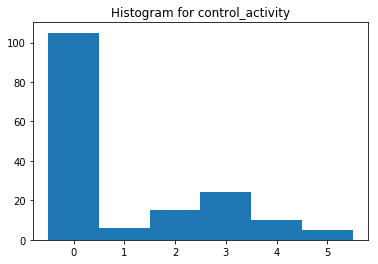

In [29]:
all_df.control_activity.fillna(0, inplace=True)
column_hist(all_df.control_activity)

In [30]:
np.any(all_df.control_activity.isna())

False

In [31]:
all_df.loc[:, 'control_activity'] = all_df.loc[:, 'control_activity'].astype('int').astype('category')

## `control_tension`

In [32]:
np.any(all_df.control_tension.isna())

True

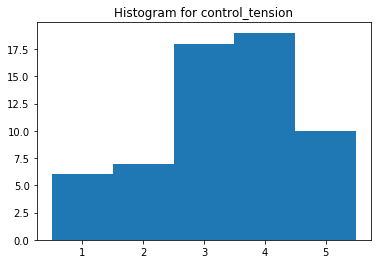

In [33]:
column_hist(all_df.control_tension)

In [34]:
all_df.control_tension.median()

3.0

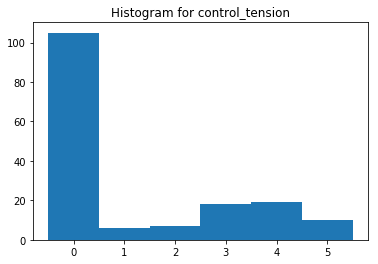

In [35]:
all_df.control_tension.fillna(0, inplace=True)
column_hist(all_df.control_tension)

In [36]:
np.any(all_df.control_tension.isna())

False

In [37]:
all_df.loc[:, 'control_tension'] = all_df.loc[:, 'control_tension'].astype('int').astype('category')

## `control_familiarity`

Drop this column, as it doesn't make any sense.

In [38]:
all_df = all_df.drop(columns='control_familiarity')
all_df.describe()

,age,personality_trusting,personality_artistic,personality_imagination,personality_reserved,personality_outgoing,personality_lazy,personality_stress,personality_nervous,personality_fault,personality_thorough,concentration,control_power,control_like_dislike,control_engagement,control_positivity,song_power,song_like_dislike,song_tension,song_engagement,song_activity,song_positivity,song_familiarity,visual_impairments,song_chillsshiversthrills,control_transcendence,control_sadness,control_wonder,control_joyfulactivation,control_tenderness,control_peacefulness,control_nostalgia,song_transcendence,song_sadness,song_wonder,song_joyfulactivation,song_tenderness,song_peacefulness,song_nostalgia,musicpref_dance,musicpref_rock,musicpref_jazz,musicpref_pop,musicpref_classical,musicpref_hiphop,musicpref_folk,musicpref_traditional_irish,musicpref_hip_hop,musicpref_world
count,165.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,72.000000,144.000000,156.000000,144.000000,144.000000,144.000000,144.000000,0.0,84.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000
mean,26.963636,3.783333,2.416667,3.866667,3.066667,3.233333,3.533333,3.250000,3.650000,3.116667,3.150000,3.866667,3.050000,2.916667,3.016667,3.083333,3.277778,3.277778,3.942308,3.222222,3.465278,3.222222,1.916667,NaN,1.750000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.916667,3.083333,3.416667,1.750000,3.500000,3.750000,2.916667,0.224242,0.551515,0.169697,0.660606,0.327273,0.036364,0.018182,0.109091,0.151515,0.230303
std,14.383210,1.026623,1.331390,1.016252,1.219428,1.184171,1.241468,1.283863,1.132344,1.222552,1.190713,1.111827,1.156045,1.356612,1.185958,1.154089,1.345019,1.371256,1.159757,1.401520,1.070345,1.173391,1.214712,NaN,1.062788,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.164500,1.240112,0.792961,0.753778,0.797724,0.965307,0.996205,0.418352,0.498853,0.376509,0.474945,0.470646,0.187763,0.134015,0.312702,0.359642,0.422308
min,9.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000,2.000000,1.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,16.000000,3.000000,1.000000,3.000000,2.000000,2.000000,3.000000,2.000000,3.000000,2.000000,2.000000,3.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,4.000000,2.000000,3.000000,2.000000,1.000000,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,2.000000,3.000000,1.000000,3.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,23.000000,4.000000,2.000000,4.000000,3.000000,3.000000,4.000000,3.000000,4.000000,3.000000,3.000000,4.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,3.000000,4.000000,3.000000,1.000000,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.000000,3.000000,3.000000,2.000000,4.000000,4.000000,3.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,32.000000,4.000000,3.250000,5.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.250000,5.000000,4.000000,4.000000,4.000000,3.000000,NaN,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.000000,4.000000,4.000000,2.000000,4.000000,4.250000,4.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,81.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,NaN,5.000000,NaN,

## `control_engagement`

In [39]:
np.any(all_df.control_engagement.isna())

True

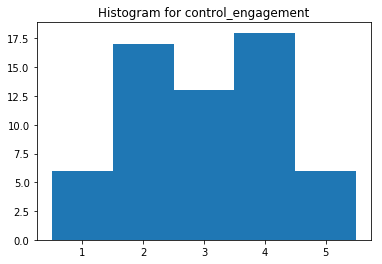

In [40]:
column_hist(all_df.control_engagement)

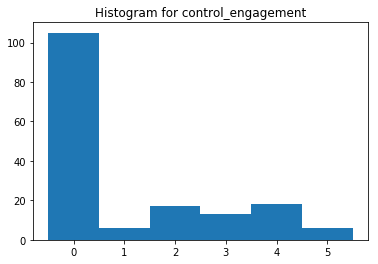

In [41]:
all_df.control_engagement.fillna(0, inplace=True)
column_hist(all_df.control_engagement)

In [42]:
all_df.loc[:, 'control_engagement'] = all_df.loc[:, 'control_engagement'].astype('int').astype('category')

## Fill other appropriate columns' NA values with 0 and 'categorify'

In [43]:
cols_to_fill_with_zero = [
    'control_positivity','control_like_dislike','song_chillsshiversthrills','song_activity','song_tension',
    'song_familiarity','song_engagement','song_positivity','song_like_dislike','song_inspired','song_wonder',
    'song_spirituality','song_thrills','song_chills','song_tenderness','song_nostalgia','song_goosebumps',
    'song_overwhelmed','song_shivers','control_power','song_transcendence','song_sadness','song_joyfulactivation',
    'song_peacefulness','song_power','personality_trusting','personality_artistic','personality_imagination',
    'personality_reserved','personality_outgoing','personality_lazy','personality_stress','personality_nervous',
    'personality_fault','personality_thorough','concentration','musicpref_traditional_irish','musicpref_jazz',
    'musicpref_folk','musicpref_hiphop','musicpref_classical','musicpref_none','musicpref_rock','musicpref_hip_hop',
    'musicpref_world','musicpref_pop','musicpref_dance','musical_background','visual_impairments',
    'hearing_impairments'
]

cols_to_drop = [
    'control_inspired','control_wonder','control_spirituality','control_thrills','control_chills',
    'control_tenderness','control_nostalgia','control_goosebumps','control_overwhelmed','control_shivers',
    'control_transcendence','control_sadness','control_joyfulactivation','control_peacefulness','dob'
]

In [44]:
for c in cols_to_fill_with_zero:
    try:
        all_df[c].fillna(0, inplace=True)
        all_df.loc[:, c] = all_df.loc[:, c].astype('int').astype('category')    
    except:
        pass

## Drop columns that don't make sense (e.g., familiarity with control stimulus)

In [45]:
for c in cols_to_drop:
    try:
        all_df = all_df.drop(columns=c)
    except:
        pass

Also drop `Unnamed: 0` column.

In [46]:
all_df = all_df.drop(columns='Unnamed: 0')

In [47]:
all_df.describe()

,age
count,165.000000
mean,26.963636
std,14.383210
min,9.000000
25%,16.000000
50%,23.000000
75%,32.000000
max,81.000000


## Fill NA values with column mode/'other' as appropriate

In [48]:
cols_to_fill_with_other = [
    'location', 'sex', 'nationality', 'language'
]

In [49]:
for c in cols_to_fill_with_other:
    all_df[c].fillna('other', inplace=True)

# Write out CSV

In [50]:
all_df.to_csv(Path('data', 'good_reaction_trials_categorified_q90_javier_all_no_nrs.csv'))

In [51]:
pd.read_csv(Path('data', 'good_reaction_trials_categorified_q90_javier_all_no_nrs.csv')).columns

Index(['_id', 'location', 'language', 'nationality', 'age', 'sex',
       'hearing_impairments', 'personality_trusting', 'personality_artistic',
       'personality_imagination', 'personality_reserved',
       'personality_outgoing', 'personality_lazy', 'personality_stress',
       'personality_nervous', 'personality_fault', 'personality_thorough',
       'musical_expertise', 'concentration', 'critical_reaction',
       'control_power', 'control_like_dislike', 'control_tension',
       'control_engagement', 'control_activity', 'control_positivity',
       'song_power', 'song_like_dislike', 'song_tension', 'song_engagement',
       'song_activity', 'song_positivity', 'song_familiarity',
       'musical_background', 'visual_impairments', 'song_chillsshiversthrills',
       'song_transcendence', 'song_sadness', 'song_wonder',
       'song_joyfulactivation', 'song_tenderness', 'song_peacefulness',
       'song_nostalgia', 'song', 'musicpref_dance', 'musicpref_rock',
       'musicpref_jazz'

# Thoughts

- Might want to look at treating Likert-type items as categorical and using a completely separate category for missing values, instead of filling them with the mean.
- Data augmentation to balance classes
- Exclude columns which are all the same for most people (chills, etc.)
- Take results from working with other songs and break out weighted F-beta scores for comparison with *Hallelujah*-only results